1.	RowNumber: Unique index for each customer record.
2.	CustomerId: Unique identifier assigned to each customer.
3.	Surname: Last name of the customer (not relevant for prediction but can be used for grouping).
4.	CreditScore: A numerical value representing the customer's credit score
5.	Geography: The country where the customer resides (France, Spain or Germany)
6.	Gender: The customer's gender (Male or Female).
7.	Age: Customer’s age in years.
8.	Tenure: Number of years the customer has been with the bank.
9.	Balance: The customer's account balance
10.	NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card).
11.	HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
12.	IsActiveMember: Whether the customer is an active bank member (1 = Active, 0 = Inactive).
13.	EstimatedSalary: Estimated annual salary of the customer.
14.	Exited: Whether the customer has churned (1 = yes, 0 = no).

Dataset link: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

Load Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import load_data

In [2]:
# load data
df = load_data(r'D:\ML_Projects\Resume Project\Customer-Churn-Prediction\data\Churn Modeling.csv')

In [3]:
# Display the first few rows to understand its structure.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Undersatnd Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


It has total 10000 Records and 13 features. It Contain 3 Object type features and rest are numerical feature.

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


Check for Missing Values

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values.

Identify Outliers

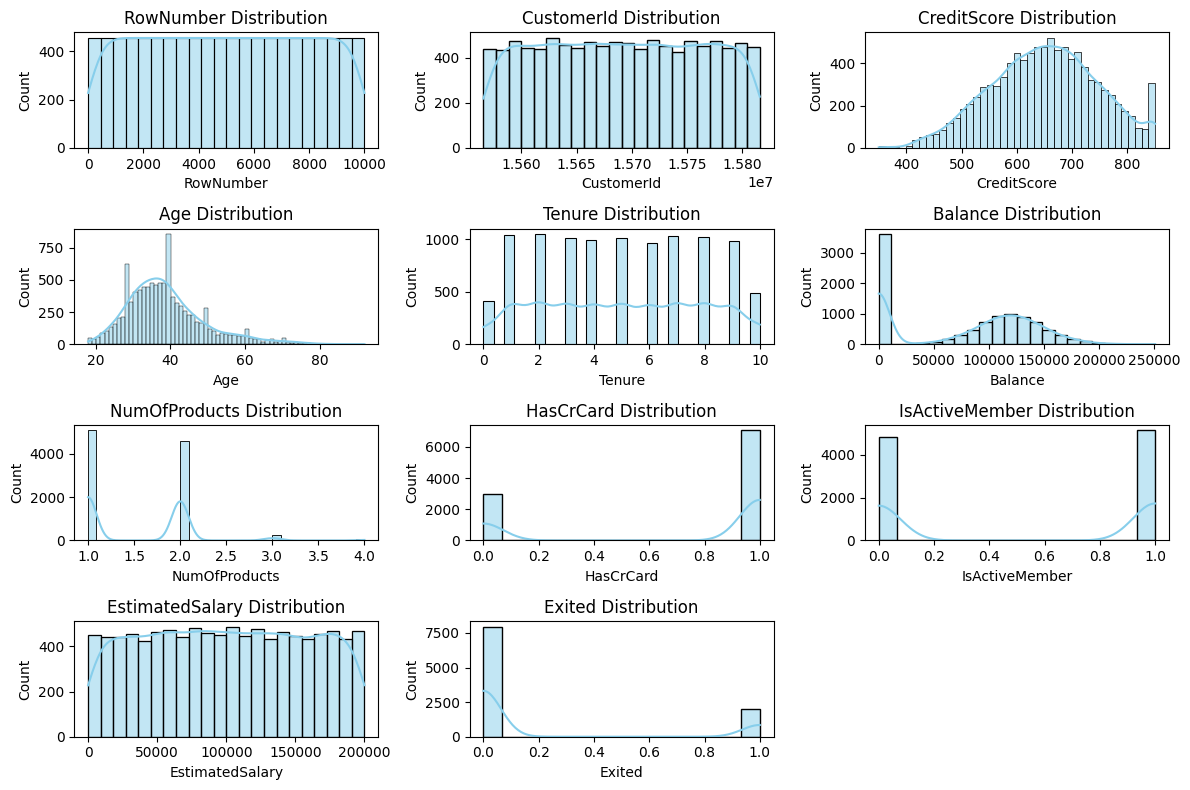

In [7]:
# Select numeric features only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot multiple histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)  # Adjust the grid size as needed
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.tight_layout()  # Avoid overlap

plt.show()


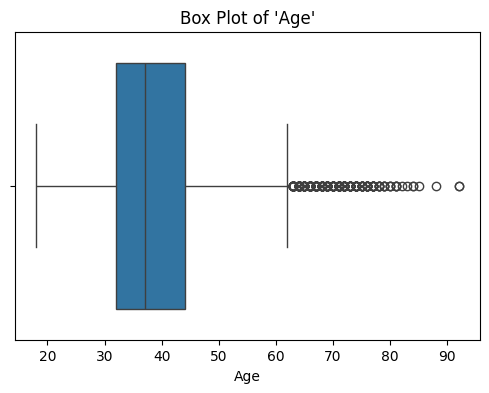

In [17]:
# Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title(f"Box Plot of 'Age'")
plt.show()

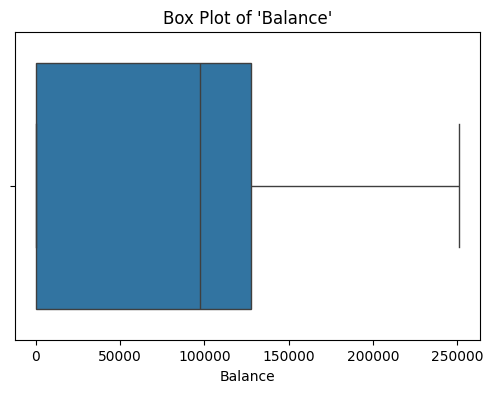

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Balance'])
plt.title(f"Box Plot of 'Balance'")
plt.show()

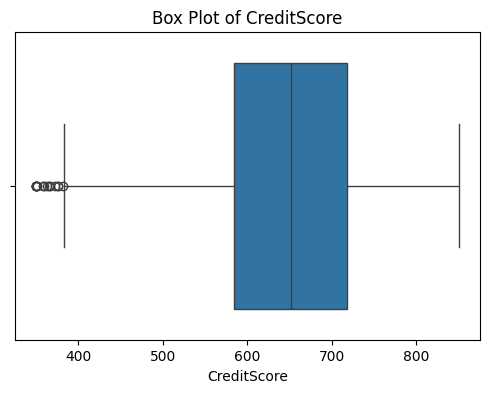

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['CreditScore'])
plt.title(f"Box Plot of CreditScore")
plt.show()

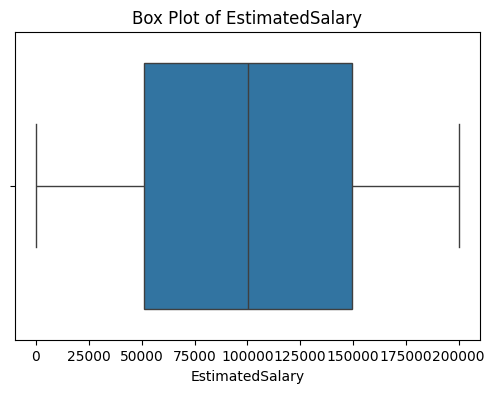

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['EstimatedSalary'])
plt.title(f"Box Plot of EstimatedSalary")
plt.show()

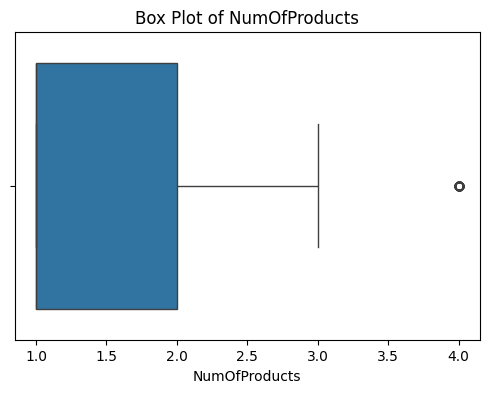

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['NumOfProducts'])
plt.title(f"Box Plot of NumOfProducts")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[''])
plt.title(f"Box Plot of 'Age'")
plt.show()

Visualize Feature Distributions

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns[1:]
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_2636\1246103096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2636\1246103096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


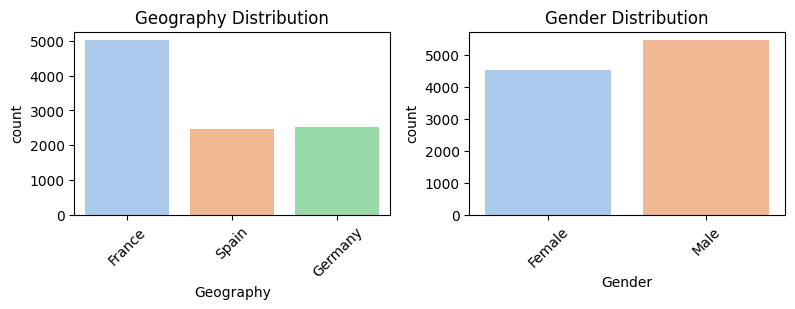

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)  # Adjust grid size based on the number of features
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


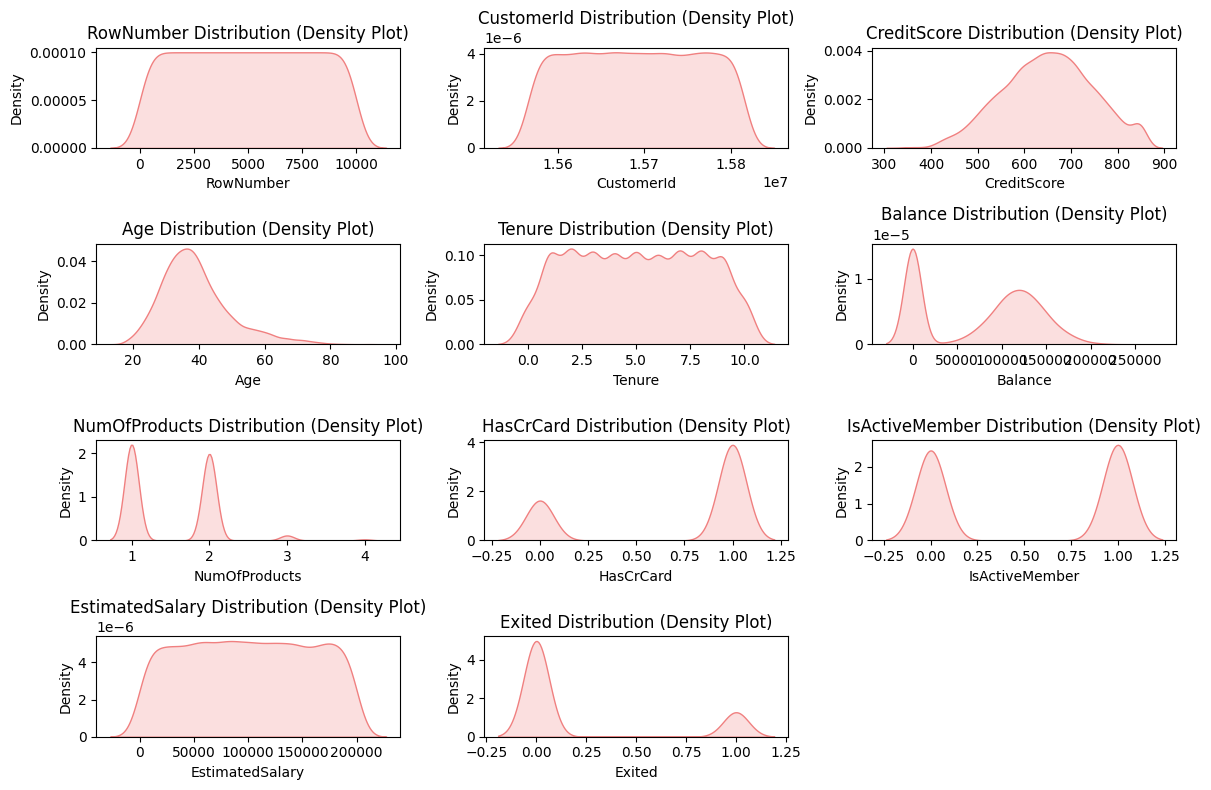

In [10]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(df[col], fill=True, color='lightcoral')
    plt.title(f'{col} Distribution (Density Plot)')
    plt.tight_layout()

plt.show()


<Axes: xlabel='Exited'>

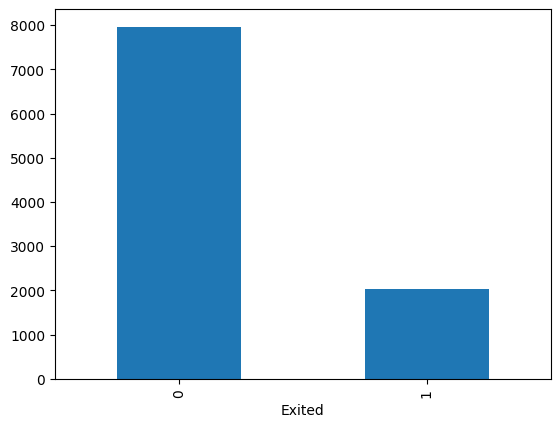

In [35]:
df['Exited'].value_counts().plot(kind='bar')

Observed Imbalanced Data in dataset.

Check Feature Correlations

<Axes: >

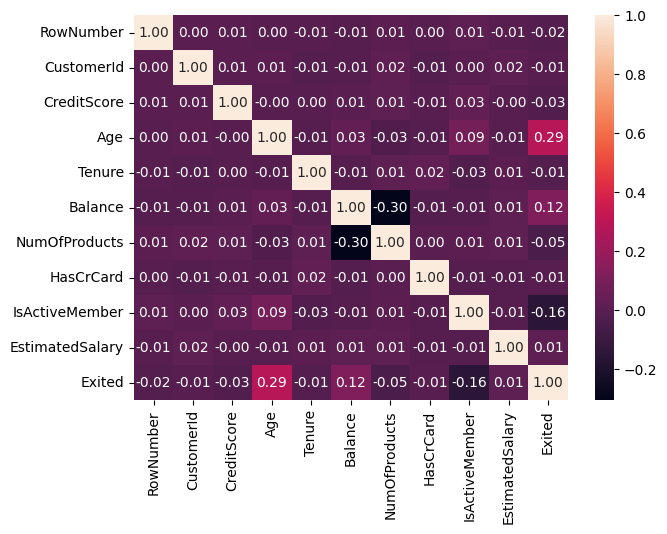

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(),annot=True,fmt='.2f')

Identify Key Patterns

In [ ]:
# Perform univariate and bivariate analysis to explore relationships between features and the target variable.
